In [1]:
import gc
from all_stand_var import conv_dict,vent_cols3
from all_own_funct import cnfl, value_filtering,y_modelling,x_modelling,evaluate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import kurtosis
import LR_build_CHD as pp
from matplotlib.backends.backend_pdf import PdfPages
import keras.backend as K
from RNN_LTSM_CHD import return_loaded_model
import pickle
import locale

from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

"""
File to evaluate the recurrent neural network for congenital heart disease cohort
"""

locale.setlocale(locale.LC_ALL, 'fr_FR')
output_folder = os.path.join(os.getcwd(), 'Results_RNN_CHD_v3', 'Base')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)



C:\Users\berend\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\berend\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\berend\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\berend\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:

#dtype_dict={'vent_cat': 'category','vent_machine':'category','vent_mode':'category'}
#df_raw=pd.read_csv(r'data\sorted_bron_date.csv',delimiter=';',converters=conv_dict,usecols=vent_cols3,dtype=dtype_dict,parse_dates=['pat_bd','pat_datetime','AdmissionDate', #'DischargeDate'],na_values=['NULL','null', 'Null','nUll','nuLl','nulL'])

#df=dfs.merge(df2, on=['pat_hosp_id','AdmissionDate',"DischargeDate"],how='left')

In [ ]:

#df = pp.data_pp_function(df_raw,path=output_folder)
#df_merged.set_index(['Admissionnumber', 'idx'], inplace=True)


In [2]:
target = 'Reintub'

X_TRAIN = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','X_TRAIN_{0}.txt'.format(target)), 'rb'))
Y_TRAIN = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','Y_TRAIN_{0}.txt'.format(target)), 'rb'))

X_VAL = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','X_VAL_{0}.txt'.format(target)), 'rb'))
Y_VAL = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','Y_VAL_{0}.txt'.format(target)), 'rb'))

X_TEST = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','X_TEST_{0}.txt'.format(target)), 'rb'))
Y_TEST = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','Y_TEST_{0}.txt'.format(target)), 'rb'))

X_BOOLMAT_VAL = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','x_boolmat_val_{0}.txt'.format(target)), 'rb'))
Y_BOOLMAT_VAL = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','y_boolmat_val_{0}.txt'.format(target)), 'rb'))

X_BOOLMAT_TEST = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','x_boolmat_test_{0}.txt'.format(target)), 'rb'))
Y_BOOLMAT_TEST = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','y_boolmat_test_{0}.txt'.format(target)), 'rb'))

no_features_cols = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','no_feature_cols_{0}.txt'.format(target)), 'rb'))
features = pickle.load(open(os.path.join(output_folder,'pickled_object_CHD','features_{0}.txt'.format(target)), 'rb'))
    
my_cmap = ListedColormap(sns.color_palette("Reds", 150))
color_list = sns.color_palette("Reds", 12)
color_list_reduced = sns.color_palette("Reds", 7)

Y_TOTAL = np.concatenate([Y_TRAIN, Y_VAL, Y_TEST], axis=0)

In [ ]:
print(np.shape(X_TRAIN))
print(np.shape(X_TEST))
print(np.shape(X_VAL))
print(np.shape(Y_TRAIN))
print(np.shape(Y_TEST))
print(np.shape(Y_VAL))
print(np.shape(X_BOOLMAT_TEST))
print(np.shape(Y_BOOLMAT_TEST))




In [3]:
Y_TEMP = np.concatenate([Y_TRAIN, Y_VAL], axis=0)
print(np.sum(np.sum(Y_TEMP.squeeze(), axis=1) > 0))

print(no_features_cols)
print(X_TRAIN.shape)


102
83
(184, 24, 83)


In [4]:
from keras.models import Model, Input, load_model 

TIME_STEPS = X_VAL.shape[1] #number of time_steps
m = return_loaded_model(model_name="ltsm_final_no_mask_Rein_pad14",output_folder=output_folder)
m_80 = return_loaded_model(model_name="ltsm_final_no_mask_Rein_pad14_80_percent",output_folder=output_folder)
m_60 = return_loaded_model(model_name="ltsm_final_no_mask_Rein_pad14_60_percent",output_folder=output_folder)
m_40 = return_loaded_model(model_name="ltsm_final_no_mask_Rein_pad14_40_percent",output_folder=output_folder)
m_20 = return_loaded_model(model_name="ltsm_final_no_mask_Rein_pad14_20_percent",output_folder=output_folder)
#m_bench = return_loaded_model(model_name="ltsm_final_no_mask_Rein_pad14_bench")
    

In [5]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################
print(np.shape(X_TRAIN))
print(np.shape(X_TEST))
print(np.shape(X_VAL))
print(np.shape(Y_TRAIN))
print(np.shape(Y_TEST))
print(np.shape(Y_VAL))
print(np.shape(X_BOOLMAT_TEST))
print(np.shape(Y_BOOLMAT_TEST))

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
Y_PRED_80_percent = m_80.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
Y_PRED_60_percent = m_60.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
Y_PRED_40_percent = m_40.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
Y_PRED_20_percent = m_20.predict(X_TEST_MASK)
del X_TEST_MASK




(184, 24, 83)
(425, 24, 83)
(213, 24, 83)
(184, 24, 1)
(425, 24, 1)
(213, 24, 1)
(425, 24, 83)
(425, 24, 1)


In [6]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

(fpr_100, tpr_100, thresholds_100) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_0[~Y_BOOLMAT_TEST])
(fpr_80, tpr_80, thresholds_80) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_80_percent[~Y_BOOLMAT_TEST])
(fpr_60, tpr_60, thresholds_60) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_60_percent[~Y_BOOLMAT_TEST])
(fpr_40, tpr_40, thresholds_40) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_40_percent[~Y_BOOLMAT_TEST])
(fpr_20, tpr_20, thresholds_20) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_20_percent[~Y_BOOLMAT_TEST])


fpr_tprs = [(fpr_100, tpr_100), (fpr_80, tpr_80), (fpr_60, tpr_60),        
            (fpr_40, tpr_40), (fpr_20, tpr_20)]

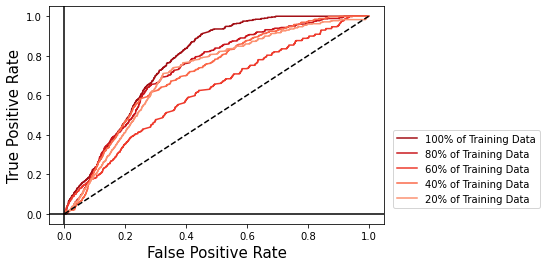

In [7]:
#############################
## SUPPLEMENTARY FIGURE 2 ###
#############################

fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[::-1], fpr_tprs, [100,80,60,40,20]):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0}% of Training Data'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.48, 0.05))
plt.savefig(os.path.join(output_folder,'{0}_less_data_roc_curves_Supplemental_Figure_2.png'.format(target)), format='png',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')
with open(os.path.join(output_folder,f"Result_scores_all.txt"),'a') as file:
    file.write('\n100 % Training Data\n')
    file.write(str(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_0[~Y_BOOLMAT_TEST])))
    # 80 % Training Data
    file.write('\n 80 % Training Data\n')
    file.write(str(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_80_percent[~Y_BOOLMAT_TEST])))
    # 60 % Training Data
    file.write('\n60 % Training Data\n')
    file.write(str(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_60_percent[~Y_BOOLMAT_TEST])))
    # 40 % Training Data
    file.write('\n40 % Training Data\n')
    file.write(str(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_40_percent[~Y_BOOLMAT_TEST])))
    # 20 % Training Data
    file.write('\n20 % Training Data\n')
    file.write(str(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_20_percent[~Y_BOOLMAT_TEST])))

    ## 100% Training Data ##
    TN, FP, FN, TP = confusion_matrix(Y_TEST[~Y_BOOLMAT_TEST], np.around(Y_PRED_mask_0[~Y_BOOLMAT_TEST])).ravel()
    PPV = TP/(TP+FP)
    file.write("\nPPV for full model is {0}\n".format(PPV))
    CR = classification_report(Y_TEST[~Y_BOOLMAT_TEST], np.around(Y_PRED_mask_0[~Y_BOOLMAT_TEST]))

    file.write("\nSensitivity for full model is {0}\n".format(CR.split('\n')[3].split()[2]))
    # classification_report(Y_TEST[~Y_BOOLMAT_TEST], np.around(Y_PRED_mask_0[~Y_BOOLMAT_TEST]))

    file.write(classification_report(Y_TEST[~Y_BOOLMAT_TEST], np.around(Y_PRED_mask_0[~Y_BOOLMAT_TEST])))

(425, 24, 83)


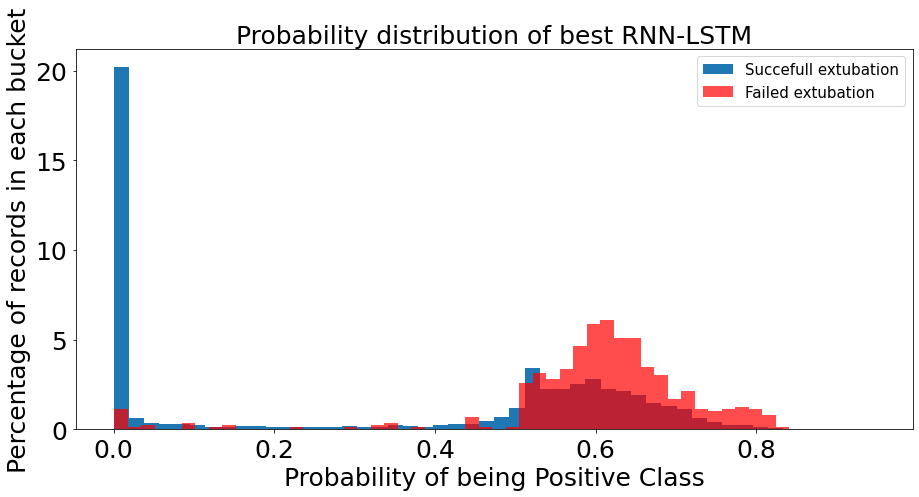

In [10]:
X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
print(np.shape(X_TEST_MASK))
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK
#print(prediction)
true_0 = (Y_TEST == 0.0)
true_1 = (Y_TEST == 1.0)
df_test=pd.DataFrame()
df_test['prob']=Y_PRED_mask_0[~Y_BOOLMAT_TEST]
df_test['true']=Y_TEST[~Y_BOOLMAT_TEST]

plt.figure(figsize=(15,7))
plt.hist(df_test['prob'].loc[df_test['true']==0], bins=50, label='Succefull extubation',density=True)
plt.hist(df_test['prob'].loc[df_test['true']==1], bins=50, label='Failed extubation', alpha=0.7, color='r',density=True)
plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Percentage of records in each bucket', fontsize=25)
plt.title('Probability distribution of best RNN-LSTM',fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
fig=plt.gcf()
plt.savefig(os.path.join(output_folder,'{0}_Probability_curve.png'.format(target)), format='png',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show(fig)
plt.close(fig)




In [ ]:
print(fal.describe(percentiles=[.05,.95]))
print(tr.describe(percentiles=[.05,.95]))

In [ ]:
##############
## FIGURE 1 ##
##############

X_TEST_MASK = np.copy(X_TEST)
X_TEST_MASK[X_BOOLMAT_TEST] = 0
print(np.shape(X_TEST_MASK))
Y_PRED_mask_0 = m.predict(X_TEST_MASK)
del X_TEST_MASK
X_TEST_MASK=np.copy(X_TEST)
mask = 1
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
print(np.shape(X_TEST_MASK))
Y_PRED_mask_1 = m.predict(X_TEST_MASK)
del X_TEST_MASK
X_TEST_MASK = np.copy(X_TEST)
mask = 2
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
print(np.shape(X_TEST_MASK))
Y_PRED_mask_2 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 3
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_3 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 4
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_4 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 5
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_5 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 6
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_6 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 7
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_7 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 8
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_8 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 9
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_9 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 10
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_10 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 11
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
Y_PRED_mask_11 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 12
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
print(np.shape(X_TEST_MASK))
Y_PRED_mask_12 = m.predict(X_TEST_MASK)
del X_TEST_MASK

X_TEST_MASK = np.copy(X_TEST)
mask = 13
X_TEST_MASK[X_BOOLMAT_TEST] = 0
X_TEST_MASK[:,mask:,:] = 0
print(np.shape(X_TEST_MASK))
Y_PRED_mask_13 = m.predict(X_TEST_MASK)
del X_TEST_MASK

In [ ]:
##############
## FIGURE 1 ##
##############

(fpr_mask_0, tpr_mask_0, thresholds_mask_0) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_0[~Y_BOOLMAT_TEST])
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_1[~Y_BOOLMAT_TEST])
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_2[~Y_BOOLMAT_TEST])
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_3[~Y_BOOLMAT_TEST])
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_4[~Y_BOOLMAT_TEST])
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_5[~Y_BOOLMAT_TEST])
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_6[~Y_BOOLMAT_TEST])
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_7[~Y_BOOLMAT_TEST])
(fpr_mask_8, tpr_mask_8, thresholds_mask_8) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_8[~Y_BOOLMAT_TEST])
(fpr_mask_9, tpr_mask_9, thresholds_mask_9) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_9[~Y_BOOLMAT_TEST])
(fpr_mask_10, tpr_mask_10, thresholds_mask_10) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_10[~Y_BOOLMAT_TEST])
(fpr_mask_11, tpr_mask_11, thresholds_mask_11) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_11[~Y_BOOLMAT_TEST])
(fpr_mask_12, tpr_mask_12, thresholds_mask_12) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_12[~Y_BOOLMAT_TEST])
(fpr_mask_13, tpr_mask_13, thresholds_mask_13) = roc_curve(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_13[~Y_BOOLMAT_TEST])

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12), 
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_0[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_13[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_12[~Y_BOOLMAT_TEST]))   
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_11[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_10[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_9[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_8[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_7[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_6[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_5[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_4[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_3[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_2[~Y_BOOLMAT_TEST]))
print(roc_auc_score(Y_TEST[~Y_BOOLMAT_TEST], Y_PRED_mask_1[~Y_BOOLMAT_TEST]))

In [ ]:
##############
## FIGURE 1 ##
##############

fig, ax = plt.subplots()
ax.set_facecolor('white')

counter = 1

for color, fpr_tpr_tuple in zip(color_list, fpr_tprs):
    if counter != 12:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='Mask Post Hour {0}'.format(counter), color=color)
        counter = counter+1
    elif counter == 12:
        plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='No Mask', color=color)
        
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.41, 0))
plt.savefig(os.path.join(output_folder,'{0}_roc_curves_Fig_1.png'.format(target)), format='png',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')

In [ ]:
##############################
## FIGURE 2 LAG EXPERIMENTS ##
##############################

### 1 DAY LAGGED EXPERIMENTS ###

### Y_PRED_mask_0_LAG_1 ###

Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(1,12)], axis=0)
Y_PRED_mask_0_LAG_2 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(2,12)], axis=0)
Y_PRED_mask_0_LAG_3 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(3,12)], axis=0)
Y_PRED_mask_0_LAG_4 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(4,12)], axis=0)
Y_PRED_mask_0_LAG_5 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(5,12)], axis=0)
Y_PRED_mask_0_LAG_6 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(6,12)], axis=0)
Y_PRED_mask_0_LAG_7 = np.concatenate([Y_PRED_mask_0[:,i][~Y_BOOLMAT_TEST[:,i,:]] for i in range(7,12)], axis=0)

# below is an equivalent representation 

# Y_PRED_mask_0_LAG_1 = np.concatenate([Y_PRED_mask_0[:,1][~Y_BOOLMAT_TEST[:,1,::]], 
#                                     Y_PRED_mask_0[:,2][~Y_BOOLMAT_TEST[:,2,::]],
#                                     Y_PRED_mask_0[:,3][~Y_BOOLMAT_TEST[:,3,::]], 
#                                     Y_PRED_mask_0[:,4][~Y_BOOLMAT_TEST[:,4,::]], 
#                                     Y_PRED_mask_0[:,5][~Y_BOOLMAT_TEST[:,5,::]], 
#                                     Y_PRED_mask_0[:,6][~Y_BOOLMAT_TEST[:,6,::]], 
#                                     Y_PRED_mask_0[:,7][~Y_BOOLMAT_TEST[:,7,::]], 
#                                     Y_PRED_mask_0[:,8][~Y_BOOLMAT_TEST[:,8,::]],
#                                     Y_PRED_mask_0[:,9][~Y_BOOLMAT_TEST[:,9,::]], 
#                                     Y_PRED_mask_0[:,10][~Y_BOOLMAT_TEST[:,10,::]], 
#                                     Y_PRED_mask_0[:,11][~Y_BOOLMAT_TEST[:,11,::]], 
#                                     Y_PRED_mask_0[:,12][~Y_BOOLMAT_TEST[:,12,::]],
#                                     Y_PRED_mask_0[:,12][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)
                                      
### all the first day soft every person, all the second days, third days, in a 1D vector
                                      
Y_TEST_LAG_1 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(1,12)], axis=0)
Y_TEST_LAG_2 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(2,12)], axis=0)
Y_TEST_LAG_3 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(3,12)], axis=0)
Y_TEST_LAG_4 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(4,12)], axis=0)
Y_TEST_LAG_5 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(5,12)], axis=0)
Y_TEST_LAG_6 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(6,12)], axis=0)
Y_TEST_LAG_7 = np.concatenate([Y_TEST[:,i][~Y_BOOLMAT_TEST[:,i,::]] for i in range(7,12)], axis=0)

#############
## Y_PREDS ##
#############                                     
                                      
Y_PRED_LAG_1 = np.concatenate([Y_PRED_mask_1[:,1,::][~Y_BOOLMAT_TEST[:,1,::]], 
                             Y_PRED_mask_2[:,2,::][~Y_BOOLMAT_TEST[:,2,::]], 
                             Y_PRED_mask_3[:,3,::][~Y_BOOLMAT_TEST[:,3,::]], 
                             Y_PRED_mask_4[:,4,::][~Y_BOOLMAT_TEST[:,4,:]],
                             Y_PRED_mask_5[:,5,::][~Y_BOOLMAT_TEST[:,5,::]], 
                             Y_PRED_mask_6[:,6,::][~Y_BOOLMAT_TEST[:,6,::]], 
                             Y_PRED_mask_7[:,7,::][~Y_BOOLMAT_TEST[:,7,::]], 
                             Y_PRED_mask_8[:,8,::][~Y_BOOLMAT_TEST[:,8,::]],
                             Y_PRED_mask_9[:,9,::][~Y_BOOLMAT_TEST[:,9,::]], 
                             Y_PRED_mask_10[:,10,::][~Y_BOOLMAT_TEST[:,10,::]], 
                             Y_PRED_mask_11[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0) 
                             #Y_PRED_mask_12[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]],axis=0)
                             #Y_PRED_mask_13[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)

Y_PRED_LAG_2 = np.concatenate([Y_PRED_mask_1[:,2,::][~Y_BOOLMAT_TEST[:,2,::]], 
                             Y_PRED_mask_2[:,3,::][~Y_BOOLMAT_TEST[:,3,::]], 
                             Y_PRED_mask_3[:,4,::][~Y_BOOLMAT_TEST[:,4,::]], 
                             Y_PRED_mask_4[:,5,::][~Y_BOOLMAT_TEST[:,5,:]],
                             Y_PRED_mask_5[:,6,::][~Y_BOOLMAT_TEST[:,6,::]], 
                             Y_PRED_mask_6[:,7,::][~Y_BOOLMAT_TEST[:,7,::]], 
                             Y_PRED_mask_7[:,8,::][~Y_BOOLMAT_TEST[:,8,::]], 
                             Y_PRED_mask_8[:,9,::][~Y_BOOLMAT_TEST[:,9,::]],
                             Y_PRED_mask_9[:,10,::][~Y_BOOLMAT_TEST[:,10,::]], 
                             Y_PRED_mask_10[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0) 
                             #Y_PRED_mask_11[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]], axis=0)
                             #Y_PRED_mask_12[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)

Y_PRED_LAG_3 = np.concatenate([Y_PRED_mask_1[:,3,::][~Y_BOOLMAT_TEST[:,3,::]], 
                             Y_PRED_mask_2[:,4,::][~Y_BOOLMAT_TEST[:,4,::]], 
                             Y_PRED_mask_3[:,5,::][~Y_BOOLMAT_TEST[:,5,::]], 
                             Y_PRED_mask_4[:,6,::][~Y_BOOLMAT_TEST[:,6,:]],
                             Y_PRED_mask_5[:,7,::][~Y_BOOLMAT_TEST[:,7,::]], 
                             Y_PRED_mask_6[:,8,::][~Y_BOOLMAT_TEST[:,8,::]], 
                             Y_PRED_mask_7[:,9,::][~Y_BOOLMAT_TEST[:,9,::]], 
                             Y_PRED_mask_8[:,10,::][~Y_BOOLMAT_TEST[:,10,::]],
                             Y_PRED_mask_9[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0) 
                             #Y_PRED_mask_10[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]], axis=0)
                             #Y_PRED_mask_11[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)

Y_PRED_LAG_4 = np.concatenate([Y_PRED_mask_1[:,4,::][~Y_BOOLMAT_TEST[:,4,:]], 
                             Y_PRED_mask_2[:,5,::][~Y_BOOLMAT_TEST[:,5,:]], 
                             Y_PRED_mask_3[:,6,::][~Y_BOOLMAT_TEST[:,6,::]], 
                             Y_PRED_mask_4[:,7,::][~Y_BOOLMAT_TEST[:,7,:]],
                             Y_PRED_mask_5[:,8,::][~Y_BOOLMAT_TEST[:,8,::]], 
                             Y_PRED_mask_6[:,9,::][~Y_BOOLMAT_TEST[:,9,::]], 
                             Y_PRED_mask_7[:,10,::][~Y_BOOLMAT_TEST[:,10,::]], 
                             Y_PRED_mask_8[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0)
                             #Y_PRED_mask_9[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]], axis=0)
                             #Y_PRED_mask_10[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~Y_BOOLMAT_TEST[:,5,:]], 
                             Y_PRED_mask_2[:,6,::][~Y_BOOLMAT_TEST[:,6,:]], 
                             Y_PRED_mask_3[:,7,::][~Y_BOOLMAT_TEST[:,7,::]], 
                             Y_PRED_mask_4[:,8,::][~Y_BOOLMAT_TEST[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~Y_BOOLMAT_TEST[:,9,::]], 
                             Y_PRED_mask_6[:,10,::][~Y_BOOLMAT_TEST[:,10,::]]], axis=0) 
                             #Y_PRED_mask_8[:,12,::][~Y_BOOLMAT_TEST[:,11,::]]],axis=0)
                             #Y_PRED_mask_9[:,13,::][~Y_BOOLMAT_TEST[:,12,::]]], axis=0)

Y_PRED_LAG_5 = np.concatenate([Y_PRED_mask_1[:,5,::][~Y_BOOLMAT_TEST[:,5,:]], 
                             Y_PRED_mask_2[:,6,::][~Y_BOOLMAT_TEST[:,6,:]], 
                             Y_PRED_mask_3[:,7,::][~Y_BOOLMAT_TEST[:,7,::]], 
                             Y_PRED_mask_4[:,8,::][~Y_BOOLMAT_TEST[:,8,:]],
                             Y_PRED_mask_5[:,9,::][~Y_BOOLMAT_TEST[:,9,::]], 
                             Y_PRED_mask_6[:,10,::][~Y_BOOLMAT_TEST[:,10,::]], 
                             Y_PRED_mask_7[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0)
                             #Y_PRED_mask_8[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]],axis=0)
                             #Y_PRED_mask_9[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)

Y_PRED_LAG_6 = np.concatenate([Y_PRED_mask_1[:,6,::][~Y_BOOLMAT_TEST[:,6,:]], 
                             Y_PRED_mask_2[:,7,::][~Y_BOOLMAT_TEST[:,7,:]], 
                             Y_PRED_mask_3[:,8,::][~Y_BOOLMAT_TEST[:,8,::]], 
                             Y_PRED_mask_4[:,9,::][~Y_BOOLMAT_TEST[:,9,:]],
                             Y_PRED_mask_5[:,10,::][~Y_BOOLMAT_TEST[:,10,::]], 
                             Y_PRED_mask_6[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0) 
                             #Y_PRED_mask_7[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]], axis=0)
                             #Y_PRED_mask_8[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)

Y_PRED_LAG_7 = np.concatenate([Y_PRED_mask_1[:,7,::][~Y_BOOLMAT_TEST[:,7,:]], 
                             Y_PRED_mask_2[:,8,::][~Y_BOOLMAT_TEST[:,8,:]], 
                             Y_PRED_mask_3[:,9,::][~Y_BOOLMAT_TEST[:,9,::]], 
                             Y_PRED_mask_4[:,10,::][~Y_BOOLMAT_TEST[:,10,:]],
                             Y_PRED_mask_5[:,11,::][~Y_BOOLMAT_TEST[:,11,::]]], axis=0)
                             #Y_PRED_mask_6[:,12,::][~Y_BOOLMAT_TEST[:,12,::]]], axis=0)
                             #Y_PRED_mask_7[:,13,::][~Y_BOOLMAT_TEST[:,13,::]]], axis=0)
                                      
## LAG ROC ##

# Day 1 Lag
print(roc_auc_score(Y_TEST_LAG_1, Y_PRED_LAG_1))
# Day 2 Lag
print(roc_auc_score(Y_TEST_LAG_2, Y_PRED_LAG_2))
# # Day 3 Lag
print(roc_auc_score(Y_TEST_LAG_3, Y_PRED_LAG_3))
# Day 4 Lag
print(roc_auc_score(Y_TEST_LAG_4, Y_PRED_LAG_4))
# Day 5 Lag
print(roc_auc_score(Y_TEST_LAG_5, Y_PRED_LAG_5))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_6, Y_PRED_LAG_6))
# Day 6 Lag
print(roc_auc_score(Y_TEST_LAG_7, Y_PRED_LAG_7))  

confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

## 100% Training Data with 1 day lag ##
TN, FP, FN, TP = confusion_matrix(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)).ravel()
PPV = TP/(TP+FP)
print("PPV for full model w/ 1 day lag is {0}".format(PPV))
CR = classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1))

print("Sensitivity for full model w/ 1 day lag is {0}".format(CR.split('\n')[3].split()[2]))
# classification_report(Y_TEST[~Y_BOOLMAT_TEST], np.around(Y_PRED_mask_0[~Y_BOOLMAT_TEST]))

print(classification_report(Y_TEST_LAG_1, np.around(Y_PRED_LAG_1)))

In [ ]:
(fpr_mask_1, tpr_mask_1, thresholds_mask_1) = roc_curve(Y_TEST_LAG_1, Y_PRED_LAG_1)
(fpr_mask_2, tpr_mask_2, thresholds_mask_2) = roc_curve(Y_TEST_LAG_2, Y_PRED_LAG_2)
(fpr_mask_3, tpr_mask_3, thresholds_mask_3) = roc_curve(Y_TEST_LAG_3, Y_PRED_LAG_3)
(fpr_mask_4, tpr_mask_4, thresholds_mask_4) = roc_curve(Y_TEST_LAG_4, Y_PRED_LAG_4)
(fpr_mask_5, tpr_mask_5, thresholds_mask_5) = roc_curve(Y_TEST_LAG_5, Y_PRED_LAG_5)
(fpr_mask_6, tpr_mask_6, thresholds_mask_6) = roc_curve(Y_TEST_LAG_6, Y_PRED_LAG_6)
(fpr_mask_7, tpr_mask_7, thresholds_mask_7) = roc_curve(Y_TEST_LAG_7, Y_PRED_LAG_7)

fpr_tprs = [(fpr_mask_1, tpr_mask_1), (fpr_mask_2, tpr_mask_2), (fpr_mask_3, tpr_mask_3), (fpr_mask_4, tpr_mask_4),
            (fpr_mask_5, tpr_mask_5), (fpr_mask_6, tpr_mask_6), (fpr_mask_7, tpr_mask_7), (fpr_mask_8, tpr_mask_8),
            (fpr_mask_9, tpr_mask_9), (fpr_mask_10, tpr_mask_10), (fpr_mask_11, tpr_mask_11), (fpr_mask_12, tpr_mask_12), 
            (fpr_mask_13, tpr_mask_13), (fpr_mask_0, tpr_mask_0)]

In [ ]:
fig, ax = plt.subplots()
ax.set_facecolor('white')

for color, fpr_tpr_tuple, i in zip(np.array(color_list_reduced)[-1:0:-1], fpr_tprs, range(1,8)):
    plt.plot(fpr_tpr_tuple[0], fpr_tpr_tuple[1], label='{0} Day Lag'.format(i), color=color)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
legend = plt.legend(loc="lower right", prop={'size': 10}, bbox_to_anchor=(1.29, 0.05))
plt.savefig(os.path.join(output_folder,'{0}_lagged_roc_curves_Fig_2.png'.format(target)), format='png',
             dpi=300, facecolor='white', transparent=True, bbox_extra_artists=(legend,), bbox_inches='tight')